In [0]:
import os
def install_req():
  !apt-get install -qq curl g++ make
  !curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
  os.chdir('spatialindex-src-1.8.5')
  !./configure
  !make
  !make install
  
  
  !pip install geopandas shapely descartes rtree  mapclassify
  os.chdir('..')

In [0]:
#!pip uninstall geopandas rtree
install_req()
!ldconfig

In [3]:
! unzip /content/AISData.csv.zip

Archive:  /content/AISData.csv.zip
  inflating: AISData.csv             
   creating: __MACOSX/
  inflating: __MACOSX/._AISData.csv  


In [0]:

! unzip /content/Nima_Ports.zip

In [0]:
import pandas as pd
import geopandas as gdp
from shapely.geometry import Point,polygon
import matplotlib.pyplot as plt
import mapclassify


In [6]:
df=pd.read_csv('AISData.csv')
df.head(3)

,Unnamed: 0,event_time,location.coordinates.0,location.coordinates.1,position_accuracy,mmsi,sog,cog
0,0,2019-04-11T09:47:30.153Z,-63.556082,44.624835,0.0,316013808,3.0,319.500000
1,1,2019-04-11T09:47:27.273Z,-63.556053,44.624817,0.0,316013808,3.0,320.700012
2,2,2019-04-11T09:47:34.340Z,-63.556138,44.624868,0.0,316013808,2.9,319.500000


In [7]:
df2 = gdp.read_file('assignment3shapefile.shp')
df2.head()

,field_1,port_name,size,geometry
0,0,pointpolygon,0.0000,"POLYGON ((-63.59160304069519 44.6649292254607,..."
1,1,port1,0.0018,"POLYGON ((-63.569431 44.649993, -63.5694396674..."
2,2,port2,0.0018,"POLYGON ((-63.60949000000001 44.675853, -63.60..."
3,3,ind,0.0000,POLYGON ((-63.54742169380188 44.64697911403847...
4,4,port5,0.0018,"POLYGON ((-63.568048 44.663875, -63.5680566674..."


In [0]:
geo_df = gdp.GeoDataFrame(df.drop(['location.coordinates.0', 'location.coordinates.0'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[Point(xy) for xy in zip(df['location.coordinates.0'], df['location.coordinates.1'])])   


In [9]:
print(geo_df.shape)

(766671, 8)


In [0]:
geo_frame=geo_df[['event_time','mmsi','sog','cog','geometry']]


In [11]:
print('size of dataframe is',geo_frame.shape)

size of dataframe is (766671, 5)


In [12]:
merged=gdp.sjoin(geo_frame,df2,how='inner',op='intersects')

/usr/local/lib/python3.6/dist-packages/geopandas/tools/sjoin.py:56: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {})
  '(%s != %s)' % (left_df.crs, right_df.crs))


In [13]:
merged.head()

,event_time,mmsi,sog,cog,geometry,index_right,field_1,port_name,size
3124,2019-06-28T09:54:52.526Z,316013808,0.1,59.700001,POINT (-63.51242666666667 44.62054166666667),8,8,auto_port,0.0015
3125,2019-06-28T09:54:52.526Z,316013808,0.1,59.700001,POINT (-63.51242666666667 44.62054166666667),8,8,auto_port,0.0015
3126,2019-05-18T10:18:55.155Z,316013808,0.0,24.299999,POINT (-63.51236166666666 44.62050166666667),8,8,auto_port,0.0015
3127,2019-06-28T09:52:13.732Z,316013808,0.3,70.000000,POINT (-63.5124 44.62049666666667),8,8,auto_port,0.0015
3128,2019-06-28T09:52:13.732Z,316013808,0.3,70.000000,POINT (-63.5124 44.62049666666667),8,8,auto_port,0.0015


## Answer 1

<Figure size 504x504 with 0 Axes>

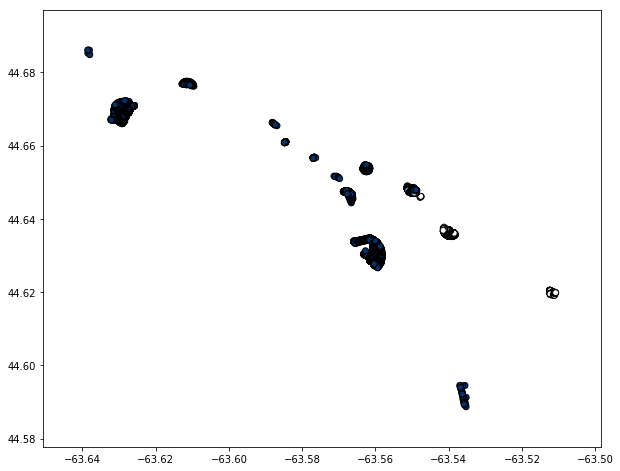

In [14]:
plt.figure(figsize=(7,7))
merged['geometry'].plot(edgecolor="k",figsize=(10,10),cmap="Blues")

## Answer 2

In [0]:
count=merged.groupby(['port_name'],as_index=False)['mmsi'].agg('count')
count_port = df2[['port_name','geometry']].merge(count,on='port_name')


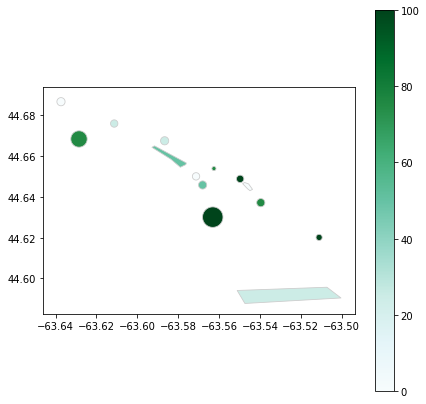

In [16]:
fig,ax=plt.subplots(1,figsize=(7,7))
count_port.plot(column='mmsi',scheme="QUANTILES", cmap='BuGn', linewidth=0.8,  edgecolor='0.8',ax=ax)
vmin,vmax=0,100
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm._A = []# add the colorbar to the figure
cbar = fig.colorbar(sm)



## Answer 4

In [0]:
auto_port=merged[merged['port_name']=='auto_port'][['event_time','geometry']]

In [0]:
auto_port['hour']=auto_port['event_time'].apply(lambda x : pd.to_datetime(x).hour)

Text(0, 0.5, 'density')

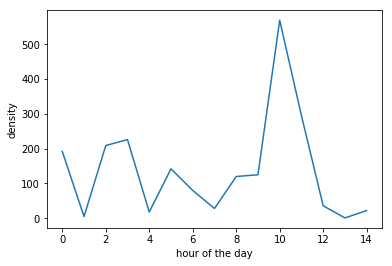

In [19]:
density=auto_port.groupby('hour',as_index=False).agg('count')
plt.plot(density.index,density['event_time'])
plt.xlabel('hour of the day')
plt.ylabel('density')

## Answer 5
Data can change over time. This can result in poor and degrading predictive performance in predictive models that assume a static relationship between input and output variables.
This problem of the changing underlying relationships in the data is called concept drift in the field of machine learning.

In the above visualization of auto_port message density,we can observe that the message density has always been chaning throughout each hours.This leads to concept drift.The message density is at it's peak at 10.00. and very low at 14.00

## Answer 6

In [0]:
X=df[['location.coordinates.0','location.coordinates.1']][:10000]


I have considered only 10000 rows due to memory usage issues,you can change it as you need.

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)# plot the cluster assignments


Text(0, 0.5, 'Feature 1')

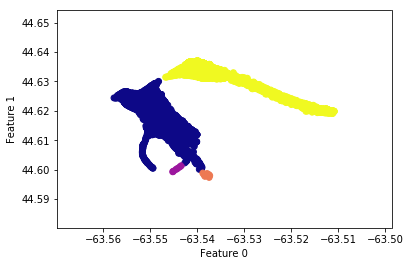

In [22]:
plt.scatter(X['location.coordinates.0'], X['location.coordinates.1'], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Answer 3

In [0]:
df.sort_values(by='event_time',inplace=True)
S = pd.to_datetime(df.event_time)[:100]  ##only considering 100 examples
for i, g in df.groupby([(S - S[0]).astype('timedelta64[h]')]):
        print (g.reset_index(drop=True))
        ##plot not done 

### References 

- http://geopandas.org/
- https://stackoverflow.com/
- https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972